#Linear Regression:
1. Design Model (input, output size, forward pass)
2. Construct loss & optimizer
3. Training Loop:
- forward pass: compute prediction and loss
- backward pass: gradients
- update weights

#Importing Libraries:

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

#Data Preparation:

In [2]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

In [3]:
#Converting to torch tensors:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

In [4]:
print(y.shape)

#Change Shape:

y = y.view(y.shape[0], 1)
print(y.shape)

torch.Size([100])
torch.Size([100, 1])


In [5]:
n_samples, n_features = X.shape

#Design Model:

In [6]:
input_size = n_features
output_size = 1

In [7]:
#Using built-in linear model with only one layer
model = nn.Linear(input_size, output_size)

#Loss & Optimizer:

In [8]:
#Using Mean Square Error function
criterion = nn.MSELoss()

learning_rate = 0.01

#Using stochastic gradient descent
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#Training Loop:

In [9]:
num_epochs = 100

In [10]:
losses = []

for epoch in range(num_epochs):
  #forward pass and loss
  y_predicted = model(X)
  loss = criterion(y_predicted, y)
  losses.append(loss.detach().numpy())

  #backward pass
  loss.backward()

  #update weights
  optimizer.step()

  #empty the gradients
  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 4444.0977
epoch: 20, loss = 3313.7822
epoch: 30, loss = 2496.1716
epoch: 40, loss = 1904.1118
epoch: 50, loss = 1474.9487
epoch: 60, loss = 1163.5739
epoch: 70, loss = 937.4639
epoch: 80, loss = 773.1407
epoch: 90, loss = 653.6329
epoch: 100, loss = 566.6594


#Plot:

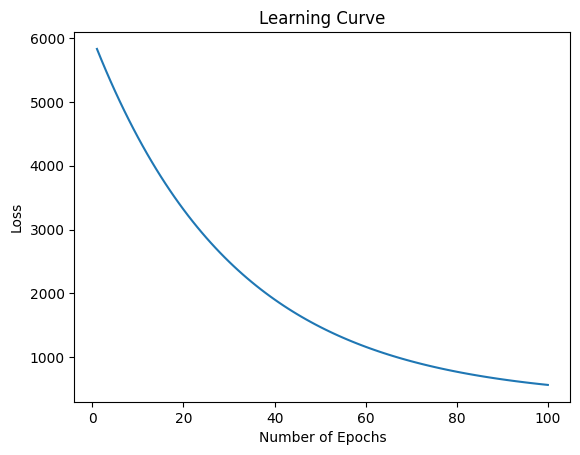

In [11]:
#num_epochs is an integer and losses is a list with 100 elements
#dimensions must be same for plotting
#Creates an epoch list from 1 to 100
epochs_list = range(1, num_epochs+1)

plt.plot(epochs_list, losses)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.show()

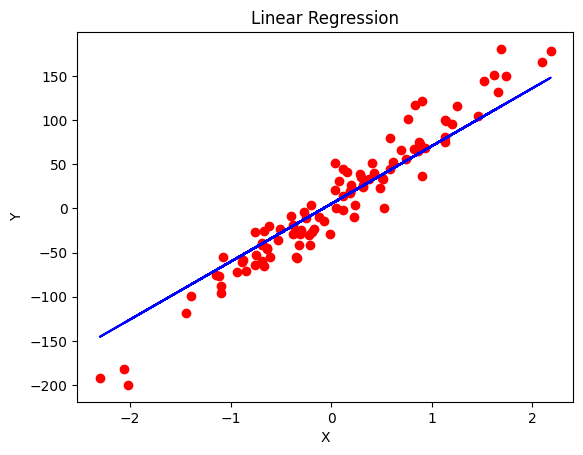

In [13]:
predicted = model(X).detach().numpy()
#creates a new tensor that is detached from the compute

plt.plot(X_numpy, y_numpy, 'ro') #Actual values
plt.plot(X_numpy, predicted, 'b') #Predicted Values
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.show()